In [221]:
import pubchempy as pcp

import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Basics, Database managment, 5 points
There is a file with the name 'chem_id_pubmed.txt' in the folder with PubChem CIDs. Please, find a way to automatically download SMILES, Fingerprint2D, and MolecularFormula for these molecules. It must be a py-script written according to PEP-8 with comments. So, it takes as an input argument file-name and returns CSV-file with columns CID, SMILES, Fingerprint2D, and MolecularFormula.


In [231]:
#open file and reading it line by line with changing the type to int
#and compound.from_cid
#adding to the list c

c_f = open('/Users/irina_angelova/Documents/chem_id_pubmed.txt', 'r')
c = []
for line in c_f:
    #print(line)
    line = line.replace('\n', '')
    line = int(line)
    s = pcp.Compound.from_cid(line)
    c.append(s)

In [233]:
#download information with pubchempy

df = pcp.compounds_to_frame(c, properties=['molecular_formula', 'isomeric_smiles','cactvs_fingerprint' ])

In [235]:
df = df.rename(columns={'cid': 'CID', 'cactvs_fingerprint': 'Fingerprint2D', 'molecular_formula': 'MolecularFormula', 'isomeric_smiles': 'SMILES'})

In [236]:
#information for each cid in dataframe

df

,Fingerprint2D,SMILES,MolecularFormula
cid,,,
459803,1100000001110011001100000000000000000000000000...,C1=CC2=C(C3=C(C=C2)C(=O)C(=CN3)C(=O)O)N=C1,C13H8N2O3
91899426,1000000001100000001111000000001000000000000000...,C(C(C1=C(C(=C(O1)O)OP(=O)([O-])[O-])[O-])O)O,C6H6O9P-3
286003,1100000001110011101110000000000000000000000000...,CC1(OC2C(O1)C(OC2C(=O)O)N3C=NC4=C(N=CN=C43)N)C,C13H15N5O5
47289,1100000001110011001100000000000000000000000000...,CN(CCCC(=O)C1=CN=CC=C1)N=O,C10H13N3O2
451668,1100000001110011101110000000000000000000000000...,C1[C@@H]([C@H](O[C@H]1N2C=NC(=NC2=O)N)CO)O,C8H12N4O4
16218924,1110000001111011100000000000000001000000000000...,CC1=NC(=CC=C1)C2=NN(C=C2C3=CC=NC4=CC=CC=C34)C(...,C25H19N5S
60961,1100000001110011101110000000000000000000000000...,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...,C10H13N5O4
2051,1100000001111011001100000000000000000100000000...,COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=CC=C3)Cl)OC,C16H14ClN3O2
2126,1110000001111010001100000000000000000000000000...,CC1(CCC(C2=C1C=CC(=C2)C(=O)NC3=CC=C(C=C3)C(=O)...,C22H25NO3


In [237]:
#saving in csv format

df.to_csv('/Users/irina_angelova/Documents/cids_info')

### 2. Basics, format convertation, 2 points
Make SDF-file from the output file from the previous assignment.


In [310]:
#didn't work, but I tried

import pandas as pd
from rdkit.Chem import PandasTools

pp = pd.read_csv('/Users/irina_angelova/Documents/cids_info') 
#PandasTools.AddMoleculeColumnToFrame(pp,'Smiles','Molecule') # pp = doesn't work for me
PandasTools.WriteSDF(pp, '/Users/irina_angelova/Documents/cids.sdf', molColName='Molecule', properties=list(pp.columns))

In [312]:
pp.columns

Index(['cid', 'Fingerprint2D', 'SMILES', 'MolecularFormula'], dtype='object')

In [316]:
rdkit.Chem.PandasTools.WriteSDF(df, 'out', molColName='cids', idName=None, properties=False, allNumeric=False)

TypeError: 'bool' object is not iterable

### 3. Basics, familiarize with RDKit library, 10
The following assignments must be done in a jupyter notebook

- Depict your molecules
- Calculate similarity of molecules using MACCS Keys, Morgan Fingerprints, and RDKit fingerprint. Plot distribution of similarity values.


##### Depicting of molecules

In [238]:
#reading file from previous step

df_2 = pd.read_csv('/Users/irina_angelova/Documents/cids_info')

In [240]:
smiles = df_2['SMILES'].to_list()

In [242]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True 

In [243]:
len(smiles)

25

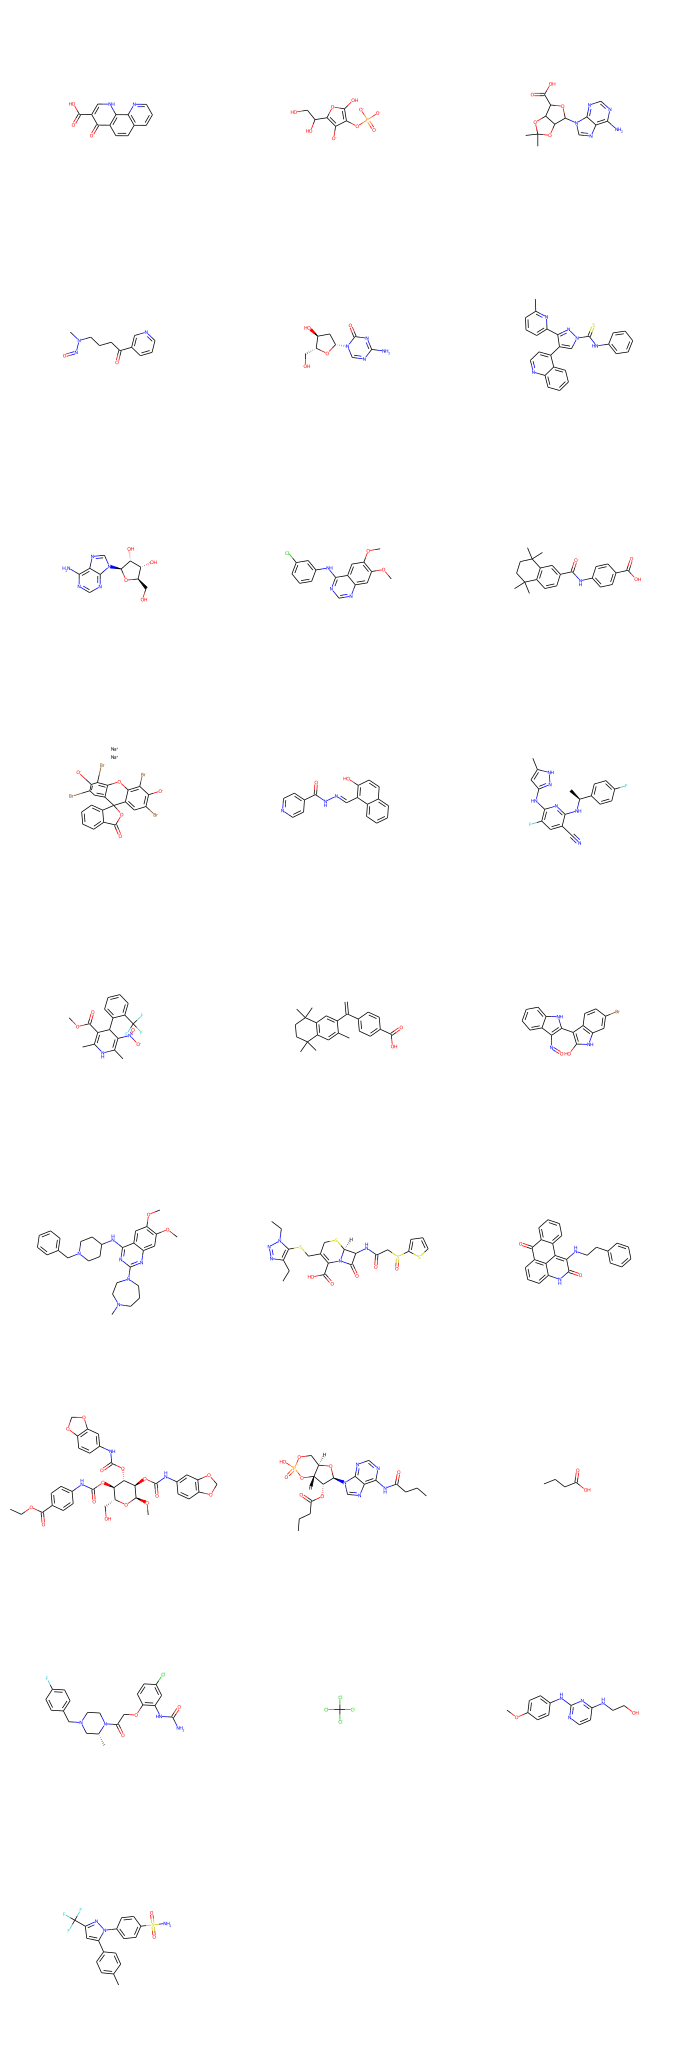

In [318]:
#drawing molecules

mols = [Chem.MolFromSmiles(x) for x in smiles]
Draw.MolsToGridImage(mols, molsPerRow = 3, subImgSize = (600, 600))

###### Calculate similarity of molecules using MACCS Keys, Morgan Fingerprints, and RDKit fingerprint. Plot distribution of similarity values.

In [269]:
#Calculate similarity of molecules using MACCS Keys, Morgan Fingerprints, and RDKit fingerprint. Plot distribution of similarity values.

from rdkit.Chem import Descriptors, AllChem, MACCSkeys, Draw

In [270]:
c_f = open('/Users/irina_angelova/Documents/chem_id_pubmed.txt', 'r')
cid_s = []
for line in c_f:
    #print(line)
    line = line.replace('\n', '')
    line = int(line)    
    cid_s.append(line)

In [271]:
from rdkit import DataStructs

##RDKit fingerprint
ms = [Chem.MolFromSmiles(x) for x in smiles]
fps = [Chem.RDKFingerprint(x) for x in ms]
l = len(fps)
sim_rktfingerp = np.zeros((25, 25))

for i in range(l):
        for j in range(l):
            sim_rktfingerp[i,j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])

In [272]:
#Paired similarity between compounds

sim_cid_rktfingerp = pd.DataFrame(sim_rktfingerp, columns = cid_s)
sim_cid_rktfingerp.index = cid_s
sim_cid_rktfingerp.head()

,459803,91899426,286003,47289,451668,16218924,60961,2051,2126,9810212,...,25150857,53789347,1080352,23891512,9687,264,512282,5943,11345983,2662
459803,1.000000,0.217797,0.291694,0.211823,0.211027,0.315678,0.261572,0.296228,0.253346,0.260304,...,0.300156,0.282051,0.332876,0.255627,0.292488,0.020772,0.233246,0.006042,0.175325,0.241680
91899426,0.217797,1.000000,0.328264,0.158281,0.224759,0.300984,0.297107,0.247961,0.214589,0.268890,...,0.285305,0.327294,0.315689,0.270189,0.340580,0.020177,0.253464,0.005109,0.177561,0.261584
286003,0.291694,0.328264,1.000000,0.159492,0.379729,0.441967,0.804100,0.313016,0.285062,0.406323,...,0.385850,0.523319,0.443396,0.412850,0.786269,0.022779,0.330769,0.005311,0.203448,0.358974
47289,0.211823,0.158281,0.159492,1.000000,0.126794,0.154600,0.151288,0.144527,0.183797,0.138822,...,0.174408,0.153553,0.167513,0.136784,0.155657,0.050147,0.140904,0.009063,0.142424,0.149907
451668,0.211027,0.224759,0.379729,0.126794,1.000000,0.258466,0.419492,0.202287,0.191549,0.248899,...,0.220974,0.256257,0.257445,0.259321,0.362252,0.031949,0.209323,0.003215,0.167785,0.230831


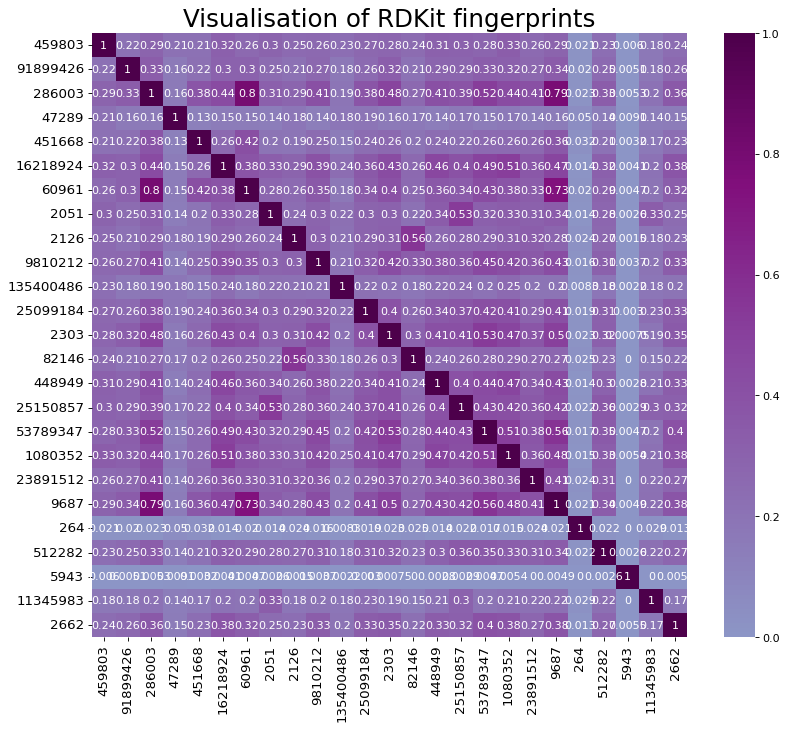

In [302]:
#Similarity
#visualisation of similarity - heatmap, dark purple - more similar, pale blue - not similar
#for Tanimoto - 0,75 - good similarity

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(sim_cid_rktfingerp, xticklabels=sim_cid_rktfingerp.columns, yticklabels=sim_cid_rktfingerp.columns, cmap='BuPu', center=0, annot=True)

# Decorations
plt.title('Visualisation of RDKit fingerprints', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [273]:
#analogue for MACCSkeys

fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]
l = len(fps)
sim_mckeys = np.zeros((25, 25))

for i in range(l):
        for j in range(l):
            sim_mckeys[i,j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])

sim_cid_mckeys = pd.DataFrame(sim_mckeys, columns = cid_s)
sim_cid_mckeys.index = cid_s
sim_cid_mckeys.head()

,459803,91899426,286003,47289,451668,16218924,60961,2051,2126,9810212,...,25150857,53789347,1080352,23891512,9687,264,512282,5943,11345983,2662
459803,1.000000,0.298246,0.450000,0.262295,0.411765,0.345455,0.453125,0.520000,0.392157,0.469388,...,0.385714,0.364706,0.519231,0.525424,0.415584,0.136364,0.360000,0.000000,0.406780,0.250000
91899426,0.298246,1.000000,0.263889,0.191176,0.408451,0.147059,0.366197,0.212121,0.171875,0.381818,...,0.231707,0.276596,0.257576,0.446154,0.430380,0.173913,0.261905,0.047619,0.318182,0.189873
286003,0.450000,0.263889,1.000000,0.270270,0.569444,0.444444,0.718750,0.453125,0.442623,0.328358,...,0.443038,0.477778,0.391304,0.507042,0.657895,0.116667,0.416667,0.017857,0.369863,0.354430
47289,0.262295,0.191176,0.270270,1.000000,0.287500,0.265625,0.265823,0.257576,0.258065,0.128571,...,0.386667,0.336957,0.365079,0.276316,0.364706,0.187500,0.379747,0.000000,0.343284,0.293333
451668,0.411765,0.408451,0.569444,0.287500,1.000000,0.351351,0.750000,0.378378,0.259740,0.289474,...,0.518519,0.479167,0.458333,0.546667,0.607143,0.134328,0.560976,0.015385,0.493151,0.318182


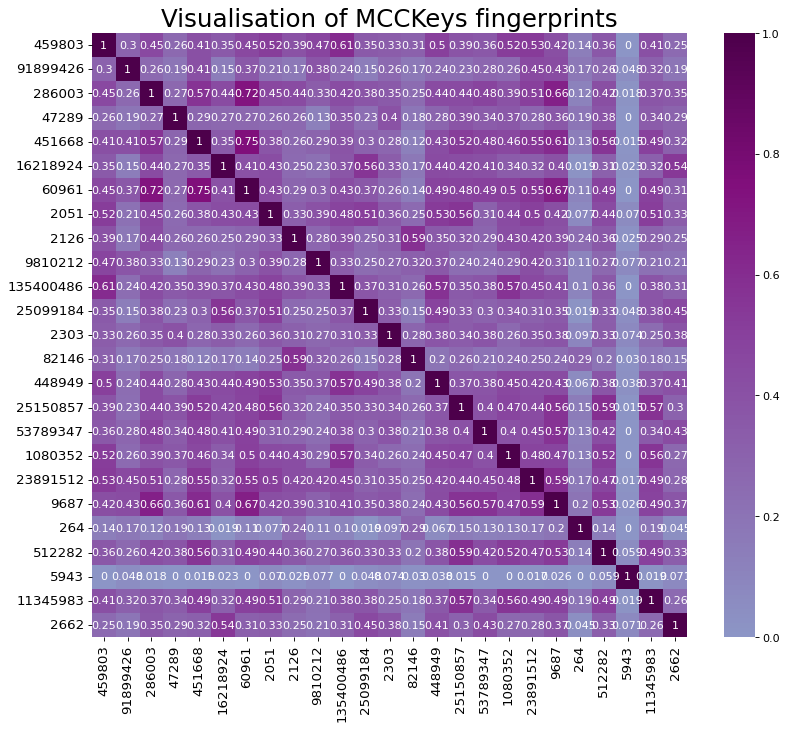

In [301]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(sim_cid_mckeys, xticklabels=sim_cid_mckeys.columns, yticklabels=sim_cid_mckeys.columns, cmap='BuPu', center=0, annot=True)

# Decorations
plt.title('Visualisation of MACCS Keys fingerprints', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [274]:
#Analogue for Morgan Fingerprints

fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2) for x in ms]
l = len(fps)
sim_morganfingerp = np.zeros((25, 25))

for i in range(l):
        for j in range(l):
            sim_morganfingerp[i,j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])

sim_cid_morganfingerp = pd.DataFrame(sim_morganfingerp, columns = cid_s)
sim_cid_morganfingerp.index = cid_s
sim_cid_morganfingerp.head()

,459803,91899426,286003,47289,451668,16218924,60961,2051,2126,9810212,...,25150857,53789347,1080352,23891512,9687,264,512282,5943,11345983,2662
459803,1.000000,0.044776,0.121622,0.177419,0.117647,0.155844,0.085714,0.101449,0.125000,0.086957,...,0.090909,0.111111,0.114286,0.066667,0.097826,0.111111,0.079545,0.0,0.119403,0.069444
91899426,0.044776,1.000000,0.053333,0.061538,0.090909,0.024096,0.074627,0.028571,0.062500,0.109375,...,0.033708,0.039216,0.057143,0.082353,0.077778,0.069767,0.070588,0.0,0.075758,0.042857
286003,0.121622,0.053333,1.000000,0.093333,0.214286,0.088889,0.465517,0.089744,0.125000,0.076923,...,0.071429,0.091743,0.048193,0.093750,0.309524,0.092593,0.118280,0.0,0.076923,0.088608
47289,0.177419,0.061538,0.093333,1.000000,0.086957,0.100000,0.071429,0.086957,0.145161,0.072464,...,0.079545,0.101010,0.100000,0.117647,0.098901,0.139535,0.105882,0.0,0.138462,0.085714
451668,0.117647,0.090909,0.214286,0.086957,1.000000,0.083333,0.344828,0.054054,0.072464,0.069444,...,0.088889,0.098039,0.066667,0.180723,0.197674,0.061224,0.114943,0.0,0.132353,0.097222


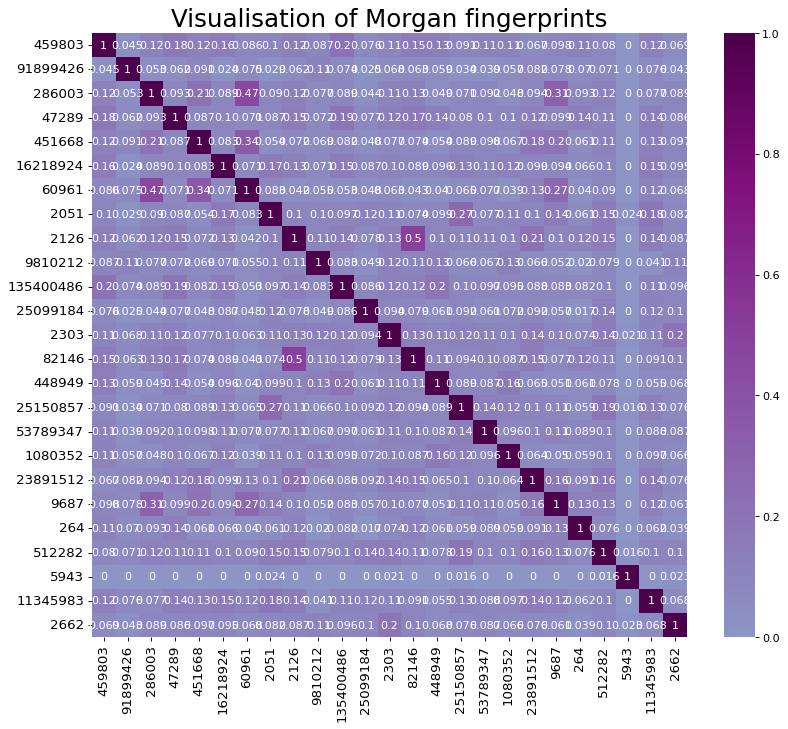

In [298]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(sim_cid_morganfingerp, xticklabels=sim_cid_morganfingerp.columns, yticklabels=sim_cid_morganfingerp.columns, cmap='BuPu', center=0, annot=True)

# Decorations
plt.title('Visualisation of Morgan fingerprints', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [319]:
#similarity between different compounds by RDKit fingerprints (T>0.75)
#result: two pairs

pairs_rktfingerp = []
for i in sim_cid_rktfingerp.columns:
    for j in sim_cid_rktfingerp.index:
        if (sim_cid_rktfingerp[i][j] >= 0.75) & (not ((j, i) in pairs_rktfingerp) & (i != j)):
            #pairs_rktfingerp.append((Chem.MolFromSmiles(i), Chem.MolFromSmiles(j)))
            pairs_rktfingerp.append((i, j))

print(pairs_rktfingerp)

#Draw.MolsToGridImage(pairs_rktfingerp, molsPerRow = 2, subImgSize = (400, 400))

[(286003, 60961), (286003, 9687)]


In [320]:
#similarity between different compounds by MACCS Keys
#result: pair

pairs_sim_cid_mckeys = []
for i in sim_cid_mckeys.columns:
    for j in sim_cid_mckeys.index:
        if (sim_cid_mckeys[i][j] >= 0.75) & (not ((j, i) in pairs_sim_cid_mckeys) & (i != j)):
            #pairs_rktfingerp.append((Chem.MolFromSmiles(i), Chem.MolFromSmiles(j)))
            pairs_sim_cid_mckeys.append((i, j))
            
print(pairs_sim_cid_mckeys)

[(451668, 60961)]


In [321]:
#similarity between different compounds by Morgan Fingerprints
#result: none

pairs_sim_cid_morganfingerp = []
for i in sim_cid_morganfingerp.columns:
    for j in sim_cid_morganfingerp.index:
        if (sim_cid_morganfingerp[i][j] >= 0.75) & (not ((j, i) in pairs_sim_cid_morganfingerp) & (i != j) ):
            #pairs_rktfingerp.append((Chem.MolFromSmiles(i), Chem.MolFromSmiles(j)))
            pairs_sim_cid_morganfingerp.append((i, j))

print(pairs_sim_cid_morganfingerp)

[]


##### Drawing similar molecules by different methods

In [279]:
p_rktf_c = []
for i in pairs_rktfingerp:
    i = list(i)
    p_rktf_c.append(i)   
print(p_rktf_c)

[[286003, 60961], [286003, 9687]]


In [280]:
#p_rktf_smiles_ch = [Chem.MolFromSmiles(x) for x in p_rktf_smiles]
p_rktf_smiles=[]
for i in p_rktf_c:
    for j in i:
        j = pcp.Compound.from_cid(j)
        p_rktf_smiles.append(j.isomeric_smiles)

In [281]:
p_rkt_moles = [Chem.MolFromSmiles(x) for x in p_rktf_smiles]

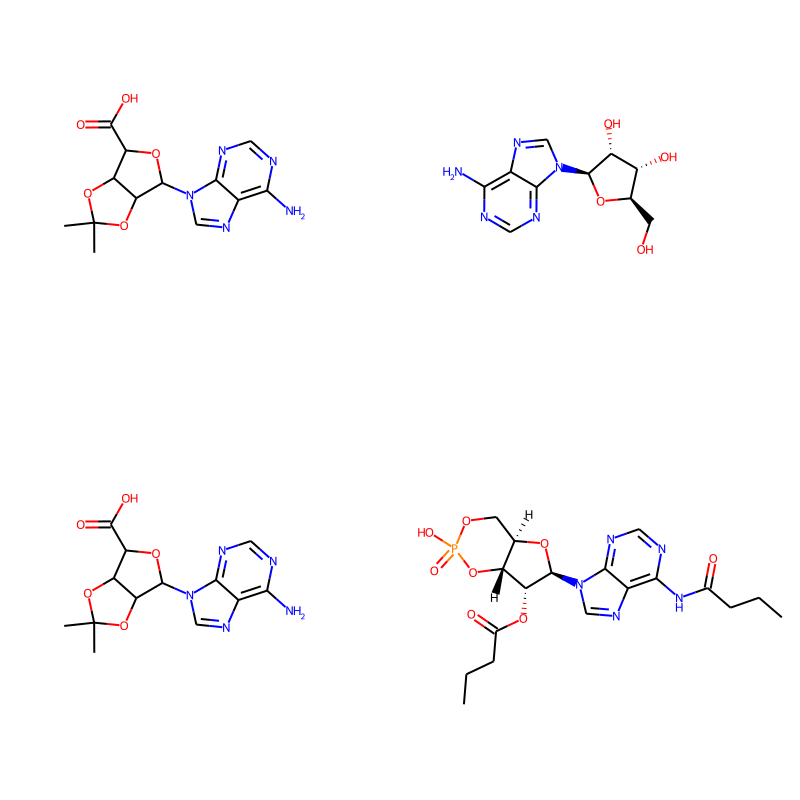

In [282]:
Draw.MolsToGridImage(p_rkt_moles, molsPerRow = 2, subImgSize = (400, 400))

In [283]:
pairs_sim_cid_mckeys

[(451668, 60961)]

[[451668, 60961]]


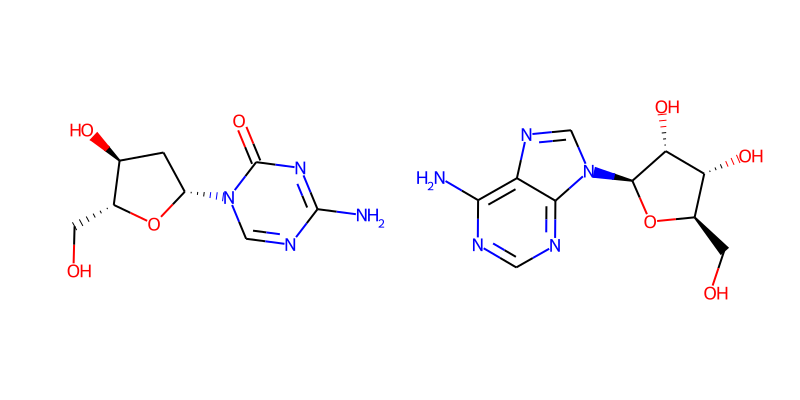

In [284]:
p_mckeys_c = []
for i in pairs_sim_cid_mckeys:
    i = list(i)
    p_mckeys_c.append(i)   
print(p_mckeys_c)

p_mckeys_smiles=[]
for i in p_mckeys_c:
    for j in i:
        j = pcp.Compound.from_cid(j)
        p_mckeys_smiles.append(j.isomeric_smiles)
        
        
p_mckeys_moles = [Chem.MolFromSmiles(x) for x in p_mckeys_smiles]

Draw.MolsToGridImage(p_mckeys_moles, molsPerRow = 2, subImgSize = (400, 400))

###### Results:

- The values of smiles, fingerprints, molecular formula were obtained from the seeds. Also the compounds were visualized. 

- Further, the coefficients of the similarity of fingerprints for all pairs are calculated using the Tanimoto coefficient. 

- Have been visualized as heat maps. And also for each of the three required methods, pairs were selected that have the required properties of similarity (T> 0.75)

##### Discussion:


The toughest method - Morgan fingerprints.
The most loyal - RDKit fingerprints. MACCS Keys fingerprints gives the smallest variation between the similarity indicators.

### 4. Advanced, code Morgan alghorithm, 20
It must be py-script written according to PEP-8 with comments. So, it takes as an input argument a file name and returns a CSV file with a table that contains atomic labels and their numbers. Moreover, it should contain module that visualize a molecule with numbering.